# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [6]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("athlete_events.csv")
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [10]:
df.shape

(30181, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [14]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [28]:
# Your code here
df['Medal'].head()
medal_counts = df.groupby(['Medal','Sex']).size()
print(medal_counts)

Medal   Sex
Bronze  F      3475
        M      6673
Gold    F      3437
        M      6730
Silver  F      3438
        M      6428
dtype: int64


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [58]:
# Здесь мы группируем данные по странам и типу медали ('Gold'), подсчитывая количество медалей
gold_medals_count = df.query("Medal == 'Gold'").groupby('Team')['Medal'].count()

# Теперь находим страну с максимальным количеством золотых медалей
max_gold_country = gold_medals_count.idxmax()
max_gold_count = gold_medals_count.max()

print(f"Страна с наибольшим количеством золотых медалей: {max_gold_country}")
print(f"Количество золотых медалей: {max_gold_count}")

Страна с наибольшим количеством золотых медалей: United States
Количество золотых медалей: 2075


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [7]:
# Your code here
cross_tab = pd.crosstab(df['Sport'], df['Sex'])

# Выводим результат
print(cross_tab)

Sex                           F     M
Sport                                
Alpine Skiing               180   174
Archery                     100   106
Art Competitions              0     2
Athletics                  1239  2409
Badminton                    73    81
Baseball                      0   333
Basketball                  390   610
Beach Volleyball             35    33
Biathlon                    147   241
Bobsleigh                    24   259
Boxing                       23   685
Canoeing                    271   770
Cross Country Skiing        316   371
Curling                      66    65
Cycling                     176   669
Diving                      161   157
Equestrianism               192   471
Fencing                     326   783
Figure Skating              125   124
Football                    301   783
Freestyle Skiing             51    51
Golf                          2     2
Gymnastics                  508   653
Handball                    421   516
Hockey      

**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [62]:
# Your code here
women_in_hockey = df[(df['Sport'] == 'Ice Hockey') & (df['Sex'] == 'F')]

# Рассчитываем средний возраст и стандартное отклонение
mean_age = women_in_hockey['Age'].mean()
std_dev = women_in_hockey['Age'].std()

# Вывод результатов
print(f"Средний возраст женщин, участвующих в хоккее на льду: {mean_age:.2f}")
print(f"Стандартное отклонение возраста: {std_dev:.2f}")

Средний возраст женщин, участвующих в хоккее на льду: 24.42
Стандартное отклонение возраста: 4.36


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [64]:
# Your code here
bronze_women = df.query("Medal == 'Bronze' and Sex == 'F'")

# Группируем данные по стране и считаем количество бронзовых медалей, полученных женщинами
bronze_women_by_country = bronze_women.groupby('Team').size()

# Находим страну с наибольшим количеством бронзовых медалей среди женщин
most_bronze_women_country = bronze_women_by_country.idxmax()

print(f"Страна с наибольшим количеством женщин, получивших бронзовые медали: {most_bronze_women_country}")

Страна с наибольшим количеством женщин, получивших бронзовые медали: United States


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

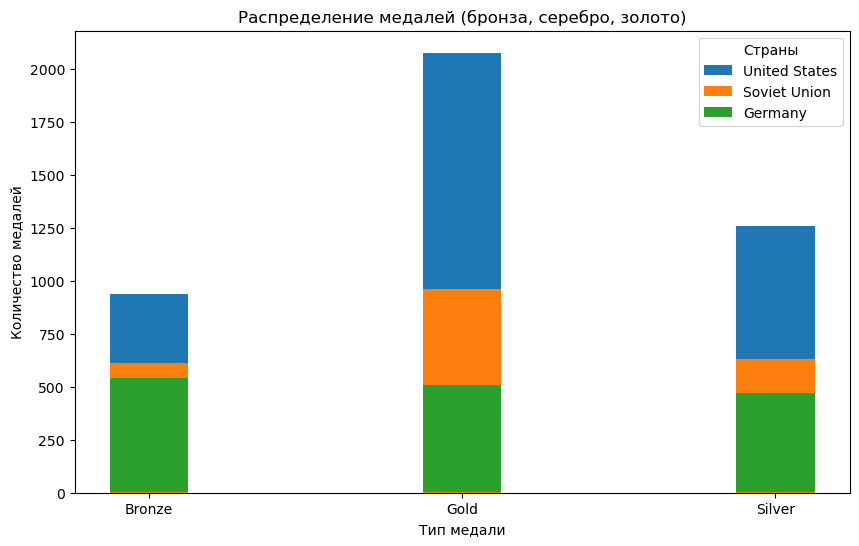

In [68]:
# Your code here
import matplotlib.pyplot as plt

# Группировка данных по странам и типам медалей
medal_counts = df.groupby(['Team', 'Medal'])['Medal'].count().reset_index(name='Count')

# Определение первых трех стран с наибольшим общим количеством медалей
total_medals = medal_counts.groupby('Team')['Count'].sum().sort_values(ascending=False)
top_three_countries = total_medals.head(3).index

# Подготовка данных для первых трех стран
top_three_data = medal_counts[medal_counts['Team'].isin(top_three_countries)]

# Построение гистограммы
plt.figure(figsize=(10, 6))
for i, country in enumerate(top_three_countries):
    country_data = top_three_data[top_three_data['Team'] == country]
    plt.bar(country_data['Medal'], country_data['Count'], label=country, width=0.25, bottom=i*0.75)
    
plt.legend(title="Страны")
plt.title("Распределение медалей (бронза, серебро, золото)")
plt.xlabel("Тип медали")
plt.ylabel("Количество медалей")
plt.show()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

NameError: name 'plt' is not defined

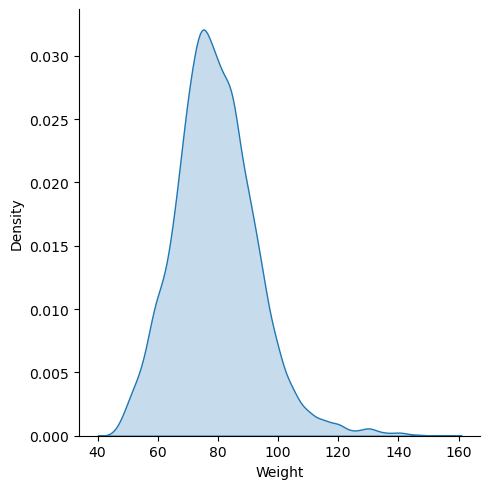

In [12]:
# Your code here
silver_men = df.query("Medal == 'Silver' and Sex == 'M'")

sns.displot(silver_men, x="Weight", kind="kde", fill=True)
plt.title("Распределение веса мужчин, получивших серебряные медали")
plt.xlabel("Вес")
plt.ylabel("Плотность")
plt.show()

**8. Постройте boxplot для возраста участника в зависимости от медали**

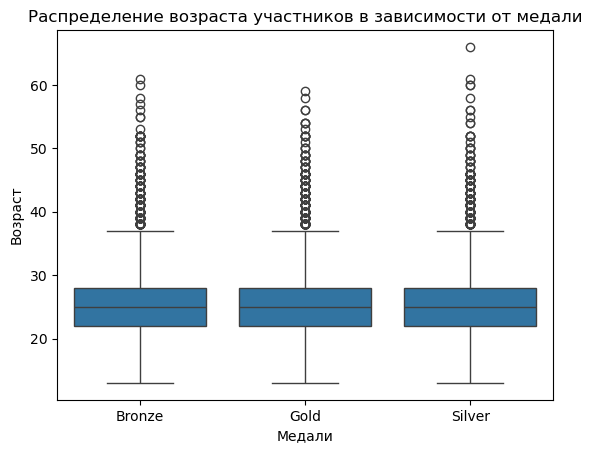

In [72]:
# Your code here
# Построение boxplot
sns.boxplot(x='Medal', y='Age', data=df)

# Настройка меток осей и заголовка
plt.xlabel('Медали')
plt.ylabel('Возраст')
plt.title('Распределение возраста участников в зависимости от медали')

# Показ графика
plt.show()

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

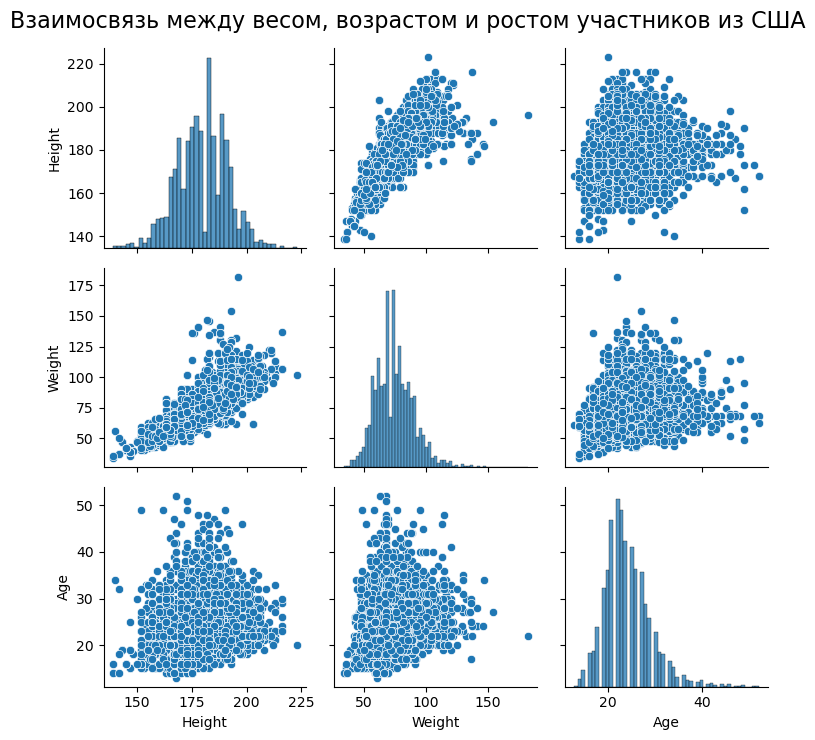

In [82]:
# Your code here
usa_participants = df.query("Team == 'United States'")

# Выбор нужных столбцов для анализа
features = ['Height', 'Weight', 'Age']
pairplot_data = usa_participants[features]

# Построение pairplot
sns.pairplot(pairplot_data)

# Настройки графика
plt.suptitle('Взаимосвязь между весом, возрастом и ростом участников из США', fontsize=16)
plt.tight_layout()

# Показ графика
plt.show()